In [1]:
#importing the libraries from pyhton
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import mean
from numpy import std

#Importing sklearn libraries
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train = pd.read_csv("train.csv")
train.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


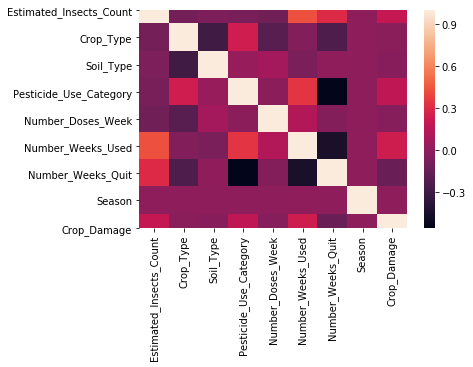

In [3]:
#Find the correlation with the variables
#annot = True gives the label inside
corrmat = train.corr()
sns.heatmap(corrmat)
#There is correlation between 
# - Estimated Insects and Number of Weeks a pesticide is used 
# - Crop Type & Pesticide Use Category has some corelation
# - Crop Damange & Pesticide Use Category has some corelation
# - Pesticide Use Category & Number of weeks used has some correlation
#Only Season has no correlation with any variable
#Crop Type & Soil Type are inveresly corelated

In [4]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(), inplace=True)

In [5]:
X = train.drop(['ID','Crop_Damage'],axis = 1)
y = train.Crop_Damage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [6]:
#Gradient Boosting Model Implementation
model = GradientBoostingClassifier()

In [7]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.001)


In [8]:
model.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

84.52397029034437

In [11]:
metrics.confusion_matrix(y_test, y_pred)

array([[18355,   231,     0],
       [ 2632,   421,     0],
       [  436,   139,     1]], dtype=int64)

In [12]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     18586
           1       0.53      0.14      0.22      3053
           2       1.00      0.00      0.00       576

    accuracy                           0.85     22215
   macro avg       0.80      0.38      0.38     22215
weighted avg       0.82      0.85      0.80     22215



In [13]:
test = pd.read_csv("test.csv")
test.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [14]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [15]:
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(), inplace=True)
test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [16]:
new_test = test.drop('ID',axis = 1)

In [17]:
predictions = model.predict(new_test)

In [18]:
submission = pd.read_csv("sample_submissiom.csv")
submission.head(5)

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [19]:
submission['ID'] = test['ID']
submission['Crop_Damage'] = predictions

In [20]:
submission.to_csv('submission_XGBoost.csv',index=False)